> The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about CFD. It is surprising that this little equation can teach us so much! Here it is:

一维线性对流方程是最简单、最基本的模型，可用于学习有关 CFD 的知识。令人惊讶的是，这个小方程式可以教会我们这么多！这里是：

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x}=0$$

> With given initial conditions (understood as a wave), the equation represents the propagation of that initial wave with speed $c$, without change of shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x−ct)$.

在给定的初始条件下（理解为波），该方程表示该初始波以速度 $c$ 的传播，形状不发生变化。设初始条件为$u(x,0)=u_0(x)$。 那么方程的精确解是$u(x,t)=u_0(x−ct)$。

> We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate $x$ into points that we index from $i=0$ to $N$, and stepping in discrete time intervals of size $Δt$.

我们在空间和时间上离散这个方程，对时间导数使用前向差分方案，对空间导数使用后向差分方案。考虑将空间坐标 $x$ 离散化为我们从 $i=0$ 到 $N$ 索引的点，并步进大小为 $Δt$ 的离散时间间隔。

> From the definition of a derivative (and simply removing the limit), we know that:

从导数的定义（并简单地去除限制），我们知道：

$$\frac{\partial u}{\partial x} \approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

> Our discrete equation, then, is:

那么，我们的离散方程是：

$$\frac{u_i^{n+1}-u_i^n}{\Delta t}+c\frac{u_i^n-u_{i-1}^{n}}{\Delta x} = 0  $$

> Where $n$ and $n+1$ are two consecutive steps in time, while $i−1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u^{n+1}_i$. We can solve for our unknown to get an equation that allows us to advance in time, as follows:

其中 $n$ 和 $n+1$ 是时间上连续的两个步骤，而 $i−1$ 和 $i$ 是离散化 $x$ 坐标的两个相邻点。 如果有给定的初始条件，那么这个离散化中唯一的未知数是$u^{n+1}_i$。我们可以对我们的未知数求解，得到一个允许我们及时推进的方程，如下：

$$u_i^{n+1}=u_i^n-c\frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^{n})$$

> Now let's try implementing this in Python.

现在让我们尝试在 Python 中实现它。

> We'll start by importing a few libraries to help us out.

我们将首先导入一些库来帮助我们。

> * `numpy` is a library that provides a bunch of useful matrix operations akin to MATLAB 
> * `matplotlib` is a 2D plotting library that we will use to plot our results
> * `time` and `sys` provide basic timing functions that we'll use to slow down animations for viewing

* `numpy` 是一个库，提供了一堆有用的矩阵运算，类似于 MATLAB
* `matplotlib` 是一个 2D 绘图库，我们将使用它来绘制我们的结果
* `time` 和 `sys` 提供了基本的计时功能，我们将使用它们来减慢观看动画的速度

In [1]:
# 记住：python 中的注释用井号表示
import numpy    #这里我们加载numpy
from matplotlib import pyplot   #这里我们加载matplolib
import time,sys #并加载一些实用程序

In [2]:
#这使 matplotlib 图出现在笔记本中（而不是单独的窗口）
%matplotlib inline

> Now let's define a few variables; we want to define an evenly spaced grid of points within a spatial domain that is 2 units of length wide, i.e., $x_i∈(0,2)$. We'll define a variable `nx`, which will be the number of grid points we want and `dx` will be the distance between any pair of adjacent grid points.

现在让我们定义一些变量；我们想在 2 个单位长度宽的空间域内定义一个均匀分布的点网格，即 $x_i∈(0,2)$。我们将定义一个变量`nx`，它将是我们想要的网格点的数量，`dx`将是任何一对相邻网格点之间的距离。

In [3]:
nx = 41     # 尝试将此数字从 41 更改为 81 并运行所有...会发生什么？
dx = 2 / (nx - 1)
nt = 25     #nt 是我们要计算的时间步数
dt = .025   ##dt 是每个时间步覆盖的时间量（增量 t）
c = 1       #假设 c = 1 的波速

> We also need to set up our initial conditions. The initial velocity $u_0$ is given as $u=2$ in the interval $0.5≤x≤1$ and $u=1$ everywhere else in $(0,2)$ (i.e., a hat function).

我们还需要设置我们的初始条件。初始速度 $u_0$ 在区间 $0.5≤x≤1$ 中给出为 $u=2$，并且在 $(0,2)$ 中的其他任何地方都给出了 $u=1$（即帽子函数）。

In [4]:
u = numpy.ones(nx)  #numpy函数ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2 #根据我们的 I.C.s 将 u = 2 设置在 0.5 和 1 之间
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


> Now let's take a look at those initial conditions using a Matplotlib plot. We've imported the `matplotlib` plotting library `pyplot` and the plotting function is called `plot`, so we'll call `pyplot.plot`. To learn about the myriad possibilities of Matplotlib, explore the [Gallery](https://matplotlib.org/stable/gallery/index.html) of example plots.

现在让我们使用 Matplotlib 图来看看这些初始条件。我们已经导入了 `matplotlib` 绘图库 `pyplot` 并且绘图函数称为 `plot`，所以我们将调用 `pyplot.plot`。要了解 Matplotlib 的无数可能性，请浏览[示例图库](https://matplotlib.org/stable/gallery/index.html)。

> Here, we use the syntax for a simple 2D plot: plot(x,y), where the x values are evenly distributed grid points:

在这里，我们使用简单 2D 绘图的语法：`plot(x,y)`，其中 `x` 值是均匀分布的网格点：

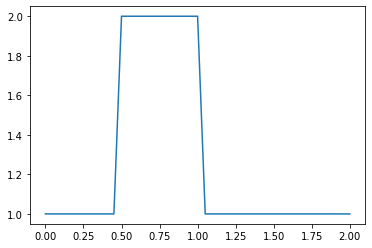

In [5]:
pyplot.plot(numpy.linspace(0,2,nx),u);

> Why doesn't the hat function have perfectly straight sides? Think for a bit.

为什么帽子函数没有完美的直边？想一想。

<br>

> Now it's time to implement the discretization of the convection equation using a finite-difference scheme.

现在是时候使用有限差分方案来实现对流方程的离散化了。

> For every element of our array `u`, we need to perform the operation $u_i^{n+1}=u_i^{n}-c\frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$

对于数组 `u` 的每个元素，我们需要执行 $u_i^{n+1}=u_i^{n}-c\frac{\Delta t}{\Delta x}(u_i^n-u_ {i-1}^n)$

> We'll store the result in a new (temporary) array `un`, which will be the solution $u$ for the next time-step. We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has convected.

我们将结果存储在一个新的（临时）数组`un`中，这将是下一个时间步的解 $u$。我们将按照我们指定的时间步长重复这个操作，然后我们可以看到波对流的距离。

> We first initialize our placeholder array `un` to hold the values we calculate for the $n+1$ timestep, using once again the NumPy function `ones()`.

我们首先使用 NumPy 函数 `ones()` 初始化占位符数组 `un` 来保存我们为 $n+1$ 时间步计算的值。

> Then, we may think we have two iterative operations: one in space and one in time (we'll learn differently later), so we'll start by nesting one loop inside the other. Note the use of the nifty `range()` function. When we write: `for i in range(1,nx)` we will iterate through the `u` array, but we'll be skipping the first element (the zero-th element). Why?

然后，我们可能会认为我们有两种迭代操作：一种在空间中，一种在时间中（我们稍后会有所不同），所以我们首先将一个循环嵌套在另一个循环中。请注意漂亮的 `range()` 函数的使用。当我们编写：`for i in range(1,nx)` 时，我们将遍历 `u` 数组，但我们将跳过第一个元素（第零个元素）。为什么？

In [6]:
un = numpy.ones(nx) #初始化一个临时数组

for n in range(nt):  #n的值从0循环到nt,所以它会运行nt次
    un = u.copy()     ##将 u 的现有值复制到 un
    for i in range(1,nx):    ## 你可以尝试注释这一行并...
    #for i in range(nx):     ## ... 取消注释这一行，看看会发生什么！
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

> **Note**: We will learn later that the code as written above is quite inefficient, and there are better ways to write this, Python-style. But let's carry on.

**注意**：我们稍后会了解到，上面编写的代码效率很低，并且有更好的Python风格的方法来编写它。但让我们继续。

> Now let's try plotting our `u` array after advancing in time.

现在让我们尝试在时间推进后绘制我们的 `u` 数组。

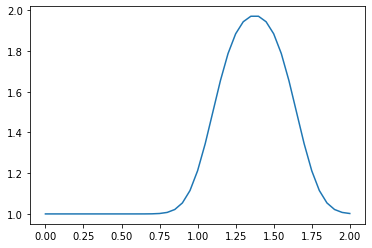

In [7]:
pyplot.plot(numpy.linspace(0,2,nx),u);

> OK! So our hat function has definitely moved to the right, but it's no longer a hat. **What's going on?**

好的！所以我们的帽子功能肯定向右移动了，但它不再是帽子了。 **这是怎么回事？**

<br>

## Last but not least / 最后一点

> Remember to rewrite Step 1 as a fresh Python script or in your own Jupyter notebook and then experiment by changing the discretization parameters. Once you have done this, you will be ready for [Step 2](https://nbviewer.org/github/barbagroup/CFDPython/blob/master/lessons/02_Step_2.ipynb).

请记住将步骤 1 重写为新的 Python 脚本或在您自己的 Jupyter 笔记本中，然后通过更改离散化参数进行实验。完成此操作后，您就可以进行[第 2 步](https://nbviewer.org/github/barbagroup/CFDPython/blob/master/lessons/02_Step_2.ipynb)了。